# Cs210 Project1  Furkan Canbal 20659

In [1]:


import matplotlib.pyplot as plt 
import reverse_geocoder as rg
from geopy.distance import geodesic
import pandas as pd
import numpy as np
import pprint
import json
from datetime import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats


df=pd.read_csv("C:\\Users\\Furkan\\Downloads\\bb.csv")




# Data Exploration

Shape of Data

In [2]:
df.shape

(118185, 11)

Description of Data

In [3]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


In [4]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

Finding pick up district and pushing into the table

In [5]:
pickup=df[["pickup_latitude","pickup_longitude"]]

pickup=pickup.apply(tuple,axis=1)


aa=[tuple(x) for x in pickup.values]

results=rg.search(aa)

data=pd.DataFrame(results)



Loading formatted geocoded file...


In [6]:
df["pickup_district"]=data[["name"]]

In [7]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City


Finding Dropoff district and pushing into the table

In [8]:
dropoff=df[["dropoff_latitude","dropoff_longitude"]]

dropoff=dropoff.apply(tuple,axis=1)


bb=[tuple(x) for x in dropoff.values]

results2=rg.search(bb)

datanew=pd.DataFrame(results2)

datanew[["name"]]
df["dropoff_district"]=datanew[["name"]]
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York


Top 5 Pick Up Point

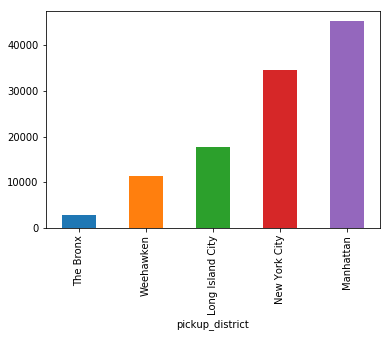

In [9]:
stats1=df.groupby(by=["pickup_district"]).count().passenger_count.sort_values().tail(5)

stats1.plot.bar()

Top 5 Dropoff point

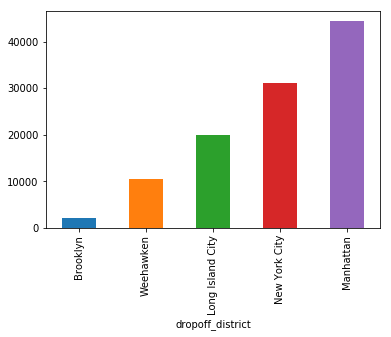

In [11]:
stats2=df.groupby(by=["dropoff_district"]).count().passenger_count.sort_values().tail(5)

stats2.plot.bar()

Adding distance to the table

In [12]:

for ind, row in df.iterrows():
 df.loc[ind,"distance"]=geodesic((row["pickup_latitude"],row["pickup_longitude"]),(row["dropoff_latitude"],row["dropoff_longitude"])).miles

In [13]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.178194
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.928961
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.228003
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,2.486098
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,2.648687
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,0.452659
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,1.372636
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,1.809375


In [14]:
##for ind, row in df.iterrows():
  ##df.loc[ind,"Time"]=pd.to_datetime(row["dropoff_datetime"])-pd.to_datetime(row["pickup_datetime"])

In [15]:
##df

Finding adding traveltime at the moment

In [16]:
datetimehour = pd.to_datetime(df['pickup_datetime']).dt.hour

df["time_of_day"]=datetimehour

for ind, row in df.iterrows():
    if row["time_of_day"] >=7 and row["time_of_day"] <9 :df.loc[ind,"time_of_day"]="rush_hour_morning"
    elif row["time_of_day"] >=9 and row["time_of_day"] <16:df.loc[ind,"time_of_day"]="afternoon"
    elif row["time_of_day"] >=16 and row["time_of_day"] <18:df.loc[ind,"time_of_day"]="rush_hour_evening"
    elif row["time_of_day"] >=18 and row["time_of_day"] <23:df.loc[ind,"time_of_day"]="evening"
    elif row["time_of_day"] >=23 :df.loc[ind,"time_of_day"]="late_night"
    elif row["time_of_day"] <7 :df.loc[ind,"time_of_day"]="late_night"
        
        



df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.933406,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.178194,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.928961,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.228003,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.562103,afternoon
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561,Hoboken,New York City,2.486098,evening
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356,Manhattan,Weehawken,2.648687,evening
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736,Manhattan,Manhattan,0.452659,afternoon
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972,New York City,New York City,1.372636,evening
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755,Long Island City,East New York,1.809375,late_night


Travelled distance according to travelling time

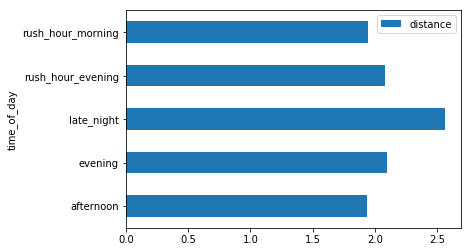

In [17]:
a=pd.DataFrame(df.groupby(by=["time_of_day"]).mean().distance)
a.plot(kind="barh")

In [18]:
b=pd.DataFrame(df.groupby(by=["time_of_day"]).mean().trip_duration)


Trip duration vs time of day

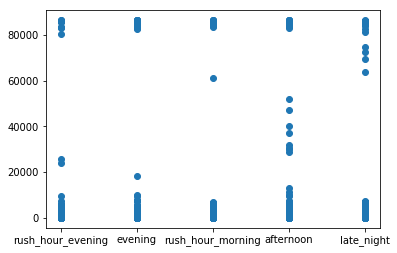

In [19]:
plt.scatter(df["time_of_day"],df["trip_duration"])


plt.show()

# Hypothesis Testing


# Does passenger group size affect the distance?

In [20]:
group1 = df[df["passenger_count"]==1]["distance"]
group2 = df[df["passenger_count"]!=1]["distance"]
stats.ttest_ind(group1,group2,equal_var=False)

Ttest_indResult(statistic=-4.901086885647331, pvalue=9.55513348155769e-07)

When we apply ttest with group1(passanger count=1) and group2(others) we get pvalue as 9.55513348155769e-07.A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so we reject the null hypothesis.So passanger group size has effect on  distance

# Do trip distances increase in weekends?# Do trip distances increase in weekends?

In [23]:
df["weekdays"]=pd.to_datetime(df["pickup_datetime"]).dt.dayofweek

In [24]:
group3=df[df["weekdays"]>4] ["distance"]
group4=df[df["weekdays"]<5] ["distance"]
stats.ttest_ind(group3,group4,equal_var=False)

Ttest_indResult(statistic=5.604877366928616, pvalue=2.0924144330692153e-08)

When we apply ttest with group3(weekend) and group4(weekdays) we get pvalue as 2.0924144330692153e-08.A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so we reject the null hypothesis.So day of week has effect on distance